# From Data Crawling to Reporting- Tweets Analysis

This project contains the following steps:

#### 1. Using Tweepy.api crawl tweets from twitter.
#### 2. Data Cleaning of the tweets.
#### 3. Vader_based Sentiment Anlaysis use both textblob and NLTK.
#### 4. Data Analysis and visualization reporting
     - Method of doing sentiment analysis
     - Analyzing by hashtag


- Import the libraries that we need to use in this project.
- Tweepy api for creating the connection for crawling the tweets and related indice of tweets.
- Numpy and Pandas are the most common libraries for data analyzing
- Textblob and NLTK for sentiment analysis. In this project we adopted the vader-based sentiment analysis
- Re for regular expression
 
- PS: before using vader_based NLTK for sentiment analysis, we need to download the lexicon first.

In [66]:

import tweepy 
import numpy as np
import pandas as pd
from textblob import TextBlob
import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
nltk.download('vader_lexicon')
#input the auth key to connect tweepy api, print result if connected sucessfully or Authen fail 



    

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

##  1 Using Tweepy.api crawl tweets from twitter
- Before crawling the data from he twitter, you need to get twitter developer account first. More information: https://developer.twitter.com/
- Install Tweepy library. (pip install tweepy). More information:http://docs.tweepy.org/en/latest/install.html
- Once you get your developer account, fill in as follow. It should work.

In [67]:

'''CONSUMER_KEY = *'
CONSUMER_SECRET = '*'
OAUTH_TOKEN = '*'
OAUTH_TOKEN_SECRET = '*'
'''



try:
    auth = tweepy.OAuthHandler(CONSUMER_KEY,CONSUMER_SECRET)
    auth.set_access_token(OAUTH_TOKEN,OAUTH_TOKEN_SECRET)
    api = tweepy.API(auth,wait_on_rate_limit=True)
    print("connected ",api)
except:
    print("Error: Authentication Failed") 


connected  <tweepy.api.API object at 0x00000276E0FB9848>


#### Function for tweets crawling
- Using tweepy.Cursor to get data according to the parameters including hashtag,language,number of tweets etc.

In [68]:
# function for tweets crawling
def tweets_crawling(hashtag,tweet_mode,lang,result_type,pagecount,items):
    df = pd.DataFrame()
    msgs = []
    msg =[]
    for tweet in tweepy.Cursor(api.search,q=hashtag,tweet_mode=tweet_mode,lang=lang,result_type=result_type,count=pagecount).items(items):
        if 'retweeted_status' in dir(tweet):
            text=tweet.retweeted_status.full_text
        else:
            text=tweet.full_text
        msg=[tweet.user.id,tweet.user.name,tweet.user.location,tweet.user.friends_count,tweet.created_at,tweet.retweet_count,tweet.favorite_count,text]
        msgs.append(msg)
    df=pd.DataFrame(msgs)
    df.columns=['user_id','user_name','user_location','user_friends_count','created_time','retweet_count','favourite_count','original_text']
    return df

## 2 Data Cleaning of the tweet.
- Hashtag extraction from tweets.
- Extracing content of tweets.

In [69]:



#function for extract hashtag from the tweets
def extract_hashtag(text):
    hashtag=[]
    for i in text:
        a=re.findall(r"#(\w+)", i)
        hashtag.append([i.capitalize() for i in a])
    return hashtag

#function for tweets cleaning by re
def data_clean(text):
    p=re.compile(r'[-,$()#+&*]')
    urlclean=re.compile(r'https://[a-zA-Z0-9.?/&=:]*',re.S)
    tagclean=re.compile(r'#[a-zA-Z0-9.?/&=:_]*',re.S)
    userclean=re.compile(r'@[a-zA-Z0-9.?/&=:_]*',re.S)
    cleaned_text=[]

    for i in text:
        nourl=re.sub(urlclean,"",i)
        nouser=re.sub(userclean,"",nourl)
        notag=re.sub(tagclean,"",nouser)
        clean =notag.replace('\n',"")
        cleaned_text.append(clean)
    return cleaned_text
    

#### Do the data crawling, data cleaning and save it to as a csv file

In [70]:
# call the functions for crawling tweets, save to the local, extracting hashtag and do data cleaning from the crwaled tweets.
df = tweets_crawling(hashtag='#vegan',tweet_mode='extended',lang='en',result_type='mixed',pagecount=100,items=100)
df.to_csv('vegancrawl.csv',header=True,index=False,encoding='utf_8_sig')
df['hashtag'] = extract_hashtag(df['original_text'])
df['cleaned_text'] = data_clean(df['original_text'])


In [71]:
df=pd.read_csv('vegancrawl.csv',index_col=False)
df['hashtag'] = extract_hashtag(df['original_text'])
df['cleaned_text'] = data_clean(df['original_text'])
df.head(5)

,user_id,user_name,user_location,user_friends_count,created_time,retweet_count,favourite_count,original_text,hashtag,cleaned_text
0,34568634,League Against Cruel Sports,"Surrey, UK",12574,2020-03-08 18:45:09,17,16,Will you be at Edinburgh Vegan Festival on Sun...,"[Edinburgh, Vegan, Festival]",Will you be at Edinburgh Vegan Festival on Sun...
1,75137937,Ari Solomon,"Los Angeles, CA",120,2020-03-08 21:59:19,10,16,"New #VeganAriShow! Talking the coronavirus, Su...","[Veganarishow, Vegan, Podcast]","New ! Talking the coronavirus, Super Tuesday, ..."
2,9890492,PETA,"Los Angeles, CA / Norfolk, VA",5021,2020-03-09 14:47:01,6,36,"Feather-free? Yes, please!\n\nThese sleek, coz...",[Vegan],"Feather-free? Yes, please!These sleek, cozy, a..."
3,3394604583,Sean Patrick,"New Jersey, USA",4999,2020-03-09 16:54:55,15,0,Peacocks and bats are sold in bizarre meat mar...,[Vegan],Peacocks and bats are sold in bizarre meat mar...
4,1185213363195961349,resinate 💐💓 GIVEAWAY,next update tbd,1099,2020-03-09 16:54:34,75,0,Who’s tried my #vegan lip balms? 🖤 \nIf you’ve...,[Vegan],Who’s tried my lip balms? 🖤 If you’ve tried m...


## 3 Vader_based Sentiment Anlaysis use both textblob and NLTK.
- Textblob: More information:https://textblob.readthedocs.io/en/dev/
- NLTK: More information:https://www.nltk.org/

In [72]:
textblob_SA=[]
textblob_poly=[]
for i in df["cleaned_text"]:
    analsysis=TextBlob(i)
    textblob_SA.append(analsysis.sentiment.polarity)
    if analsysis.sentiment.polarity>=0.1:
        textblob_poly.append("Positive")
    elif analsysis.sentiment.polarity<=-0.1:
        textblob_poly.append("Negative")
    else:
        textblob_poly.append("Neutral")
df["textblob_SA"]=textblob_SA
df["textblob_poly"]=textblob_poly
nltk_vsa=[]
nltk_poly=[]
sid=SentimentIntensityAnalyzer()
for i in df["cleaned_text"]:
    nltk_vsa.append(sid.polarity_scores(i)['compound'])
    if sid.polarity_scores(i)['compound']>=0.1:
        nltk_poly.append("Positive")
    elif sid.polarity_scores(i)['compound']<=-0.1:
        nltk_poly.append("Negative")
    else:
        nltk_poly.append("Neutral")
        
df["nltk_vsa"]=nltk_vsa
df["nltk_poly"]=nltk_poly
df.head(5)

,user_id,user_name,user_location,user_friends_count,created_time,retweet_count,favourite_count,original_text,hashtag,cleaned_text,textblob_SA,textblob_poly,nltk_vsa,nltk_poly
0,34568634,League Against Cruel Sports,"Surrey, UK",12574,2020-03-08 18:45:09,17,16,Will you be at Edinburgh Vegan Festival on Sun...,"[Edinburgh, Vegan, Festival]",Will you be at Edinburgh Vegan Festival on Sun...,0.625000,Positive,0.6800,Positive
1,75137937,Ari Solomon,"Los Angeles, CA",120,2020-03-08 21:59:19,10,16,"New #VeganAriShow! Talking the coronavirus, Su...","[Veganarishow, Vegan, Podcast]","New ! Talking the coronavirus, Super Tuesday, ...",0.296757,Positive,0.8306,Positive
2,9890492,PETA,"Los Angeles, CA / Norfolk, VA",5021,2020-03-09 14:47:01,6,36,"Feather-free? Yes, please!\n\nThese sleek, coz...",[Vegan],"Feather-free? Yes, please!These sleek, cozy, a...",0.112500,Positive,0.8118,Positive
3,3394604583,Sean Patrick,"New Jersey, USA",4999,2020-03-09 16:54:55,15,0,Peacocks and bats are sold in bizarre meat mar...,[Vegan],Peacocks and bats are sold in bizarre meat mar...,0.200000,Positive,-0.0772,Neutral
4,1185213363195961349,resinate 💐💓 GIVEAWAY,next update tbd,1099,2020-03-09 16:54:34,75,0,Who’s tried my #vegan lip balms? 🖤 \nIf you’ve...,[Vegan],Who’s tried my lip balms? 🖤 If you’ve tried m...,0.312500,Positive,0.8016,Positive


## Data Analysis and visualization reporting

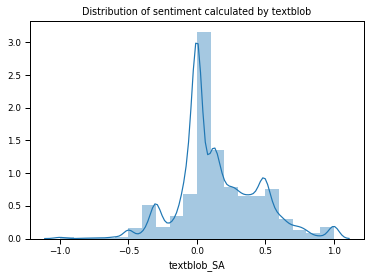

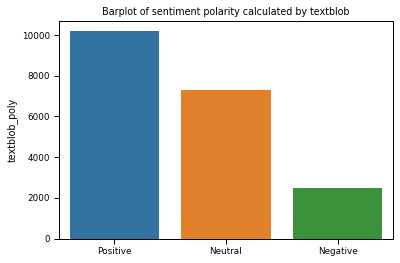

In [63]:
sns.distplot(df.textblob_SA,bins=20)
plt.title("Distribution of sentiment calculated by textblob")
plt.show()

tb=df.textblob_poly.value_counts()
sbn.barplot(x=tb.index,y=tb)
plt.title("Barplot of sentiment polarity calculated by textblob")
plt.show()


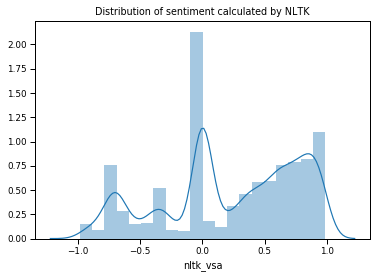

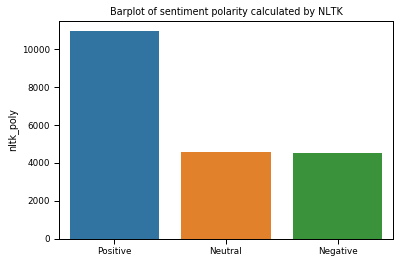

In [64]:
sns.distplot(df.nltk_vsa, bins=20,hist=True)
plt.title("Distribution of sentiment calculated by NLTK")
plt.show()
nl=df.nltk_poly.value_counts()
sbn.barplot(x=nl.index,y=nl)
plt.title("Barplot of sentiment polarity calculated by NLTK")
plt.show()

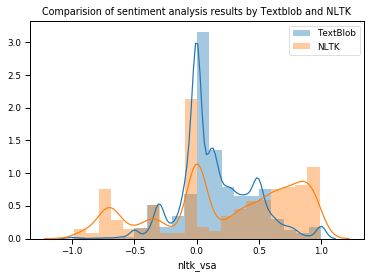

In [65]:
sns.distplot(df.textblob_SA,bins=20,label="TextBlob")
sns.distplot(df.nltk_vsa, bins=20,hist=True,label="NLTK")
plt.title("Comparision of sentiment analysis results by Textblob and NLTK")
plt.legend()
plt.show()

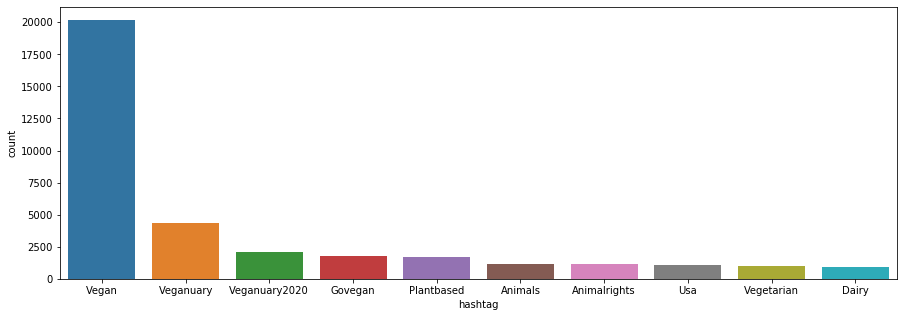

In [18]:
hashtag=[]
count=0
for i in df.hashtag:
    for j in i:
        count+=1
        hashtag.append(j)
        

ht_df=pd.DataFrame()       
ht_df['hashtag']=hashtag
item=ht_df['hashtag'].value_counts()
ht_df

plt.figure(figsize=(15,5))
sns.countplot(ht_df['hashtag'],order=item.nlargest(10).index)
